In [1]:
# #Main Training Code
# import os
# import cv2
# import numpy as np
# import tensorflow as tf
# import tensorflow.keras.backend as K
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.applications import mobilenet_v2
# from tensorflow.keras.models import Sequential, load_model
# from tensorflow.keras.applications.resnet50 import ResNet50
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten
# print("Imported Successfully")

# # Load the image data
# train_images = []
# train_labels = []
# is_validation=False
# input_dir = '/kaggle/input/validation-data1'
# for image_file in os.listdir(input_dir):
#     label_keyword = "positive" if is_validation else ""
#     image = cv2.imread(os.path.join(input_dir, image_file))
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     image = cv2.resize(image, (64, 64))
#     image = np.stack([image, image, image], axis=2)
#     train_images.append(image)
#     if is_validation:
#         train_labels.append(True if "positive" in image_file else False)
#     else:
#         train_labels.append(int(image_file.split('_')[1].split('.')[0]))
# print("Loaded Successfully")

# # Preprocess the image data
# train_images = np.array(train_images, dtype=object)
# train_images = train_images / 255.0
# train_labels = np.array(train_labels)
# train_images = np.array(train_images, dtype=np.float32)
# val_split, num_classes = 0.2, 60000
# train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=val_split, random_state=42)
# print("Success")

# # Build the CNN model
# model = Sequential()
# resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
# model.add(resnet50)
# model.add(Flatten())
# model.add(Dense(num_classes, activation='sigmoid'))
# print(model, "\nModel Built")

# # Compile the model
# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# print(model, "\nModel Compiled")

In [2]:
# # Train the model
# model.fit(train_images, train_labels, epochs=500, validation_data=(val_images, val_labels))
# model.save('trained_model.h5')
# print("Model Saved")

In [3]:
# #Test Code (Work in Progress) 
# import os
# import cv2
# import numpy as np
# from tqdm import tqdm
# import tensorflow as tf
# import tensorflow.keras.backend as K
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.applications import mobilenet_v2
# from tensorflow.keras.models import Sequential, load_model
# from tensorflow.keras.applications.resnet50 import ResNet50
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten
# print("Imported Successfully")

# # Function to load and preprocess images for training or validation
# def load_and_preprocess_images(folder_path, is_validation=False):
#     images, labels = [], []
#     label_keyword = "positive" if is_validation else ""
#     for image_file in tqdm(os.listdir(folder_path), desc=f"Loading {folder_path}"):
#         image = cv2.imread(os.path.join(folder_path, image_file))
#         image = cv2.resize(image, (64, 64))
#         image = np.stack([image, image, image], axis=2)
#         images.append(image)
#         if is_validation:
#             labels.append(True if "positive" in image_file else False)
#         else:
#             labels.append(int(image_file.split('_')[1].split('.')[0]))
#     return np.array(images, dtype=np.float32) / 255.0, np.array(labels)

# # Load train and validation data
# train_images, train_labels = load_and_preprocess_images('/kaggle/input/test-train-data/test_train_data')
# val_images, val_labels = load_and_preprocess_images('/kaggle/input/p-val-data/processed_validation_data', is_validation=True)

# # Preprocess the image data
# print("Pre-Processing...")
# train_images = np.array(train_images, dtype=np.float32) / 255.0
# val_images = np.array(val_images, dtype=np.float32) / 255.0
# train_labels, val_labels = np.array(train_labels), np.array(val_labels)
# num_classes = 60000

# # Build the CNN model
# print("Building Model...")
# model = Sequential()
# resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
# model.add(resnet50)
# model.add(Flatten())
# model.add(Dense(num_classes, activation='sigmoid'))
# print("Compiling in Progress...")
# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# print(model, "\nModel Built & Compiled")

In [4]:
# # Train the model
# print("Training in Progress...")
# with tqdm(total=100) as pbar:
#     for epoch in range(100):
#         model.fit(train_images, train_labels, epochs=1, validation_data=(val_images, val_labels))
#         pbar.update(1)

# # Save the trained model
# model.save('trained_model.h5')
# print("Trained Model Saved!")

In [5]:
# import os
# import cv2
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# import tensorflow as tf
# from keras.layers import Dense
# from keras import Model
# from keras import optimizers
# from keras.optimizers import Adam
# from keras.preprocessing.image import ImageDataGenerator
# from keras.applications.vgg16 import VGG16
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelBinarizer
# from keras.callbacks import ModelCheckpoint, EarlyStopping

# path = "/kaggle/input/validation-data1"

# # Assuming filenames contain 'positive' or 'negative' to indicate labels
# positive_label = 'positive'
# negative_label = 'negative'

# train_images = []
# train_labels = []

# def load_images_and_labels():
#     for filename in os.listdir(path):
#         if filename.endswith(".jpg"):
#             img = cv2.imread(os.path.join(path, filename))
#             label = 1 if positive_label in filename else 0
#             resized = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)
#             train_images.append(resized)
#             train_labels.append(label)

# load_images_and_labels()

# X_new = np.array(train_images)
# y_new = np.array(train_labels)

# vggmodel = VGG16(weights='imagenet', include_top=True)

# for layer in vggmodel.layers[:15]:
#     layer.trainable = False

# X = vggmodel.layers[-2].output
# predictions = Dense(2, activation="softmax")(X)
# model_final = Model(inputs=vggmodel.input, outputs=predictions)

# opt = Adam(lr=0.0001)
# model_final.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=["accuracy"])

# lenc = LabelBinarizer()
# Y = lenc.fit_transform(y_new)

# X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.10)

# trdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
# traindata = trdata.flow(x=X_train, y=y_train)

# tsdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
# testdata = tsdata.flow(x=X_test, y=y_test)

# checkpoint = ModelCheckpoint("plastic_container_model.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
# early = EarlyStopping(monitor='val_loss', min_delta=0, patience=1000, verbose=1, mode='auto')

# hist = model_final.fit_generator(generator=traindata, steps_per_epoch=10, epochs=100,
#                                   validation_data=testdata, validation_steps=2, callbacks=[checkpoint, early])

# plt.plot(hist.history['loss'])
# plt.plot(hist.history['val_loss'])
# plt.title("model loss")
# plt.ylabel("Loss")
# plt.xlabel("Epoch")
# plt.legend(["Loss", "Validation Loss"])
# plt.show()

In [6]:
# # Test the model on a sample image from the test set
# im = X_test[0]
# plt.imshow(im)
# img = np.expand_dims(im, axis=0)
# out = model_final.predict(img)

# if out[0][0] > out[0][1]:
#     print("Positive: Plastic container present")
# else:
#     print("Negative: No plastic container")

In [7]:
# # Visualization on some images
# z = 0
# for filename in os.listdir(path):
#     if filename.endswith(".jpg") and filename.startswith("7"):
#         z += 1
#         img = cv2.imread(os.path.join(path, filename))
#         resized = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)
#         img = np.expand_dims(resized, axis=0)
#         out = model_final.predict(img)
#         if out[0][0] > 0.65:
#             plt.figure()
#             plt.imshow(img)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


553467096/553467096 [==============================] - 3s 0us/step


/opt/conda/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/tmp/ipykernel_24/3003944371.py:65: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model_final.fit_generator(generator=traindata, steps_per_epoch=10, epochs=100,


Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 1.0199 - accuracy: 0.3375
Epoch 1: val_loss improved from inf to 0.13083, saving model to plastic_container_model.h5
10/10 [==============================] - 19s 994ms/step - loss: 1.0199 - accuracy: 0.3375 - val_loss: 0.1308 - val_accuracy: 0.2812
Epoch 2/100
10/10 [==============================] - ETA: 0s - loss: 0.0460 - accuracy: 0.3562
Epoch 2: val_loss improved from 0.13083 to 0.00002, saving model to plastic_container_model.h5
10/10 [==============================] - 16s 2s/step - loss: 0.0460 - accuracy: 0.3562 - val_loss: 2.2469e-05 - val_accuracy: 0.2344
Epoch 3/100
10/10 [==============================] - ETA: 0s - loss: 0.0849 - accuracy: 0.3063
Epoch 3: val_loss did not improve from 0.00002
10/10 [==============================] - 5s 471ms/step - loss: 0.0849 - accuracy: 0.3063 - val_loss: 1.1191e-04 - val_accuracy: 0.3594
Epoch 4/100
10/10 [==============================] - ETA: 0s - loss: 0.0216 - accu

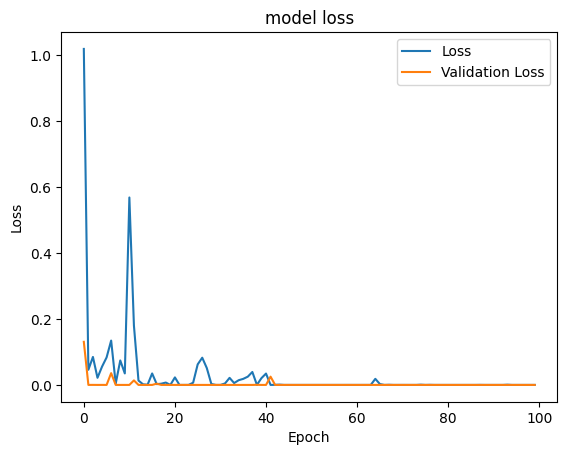

<Figure size 640x480 with 0 Axes>

In [8]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.layers import Dense
from keras import Model
from keras import optimizers
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Update this variable with the path to the image you want to test
path = "/kaggle/input/validation-data1"

# Assuming filenames contain 'positive' or 'negative' to indicate labels
positive_label, negative_label = 'positive', 'negative'
train_images = []
train_labels = []

def load_images_and_labels():
    for filename in os.listdir(path):
        if filename.endswith(".jpg"):
            img = cv2.imread(os.path.join(path, filename))
            label = 1 if positive_label in filename else 0
            resized = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)
            train_images.append(resized)
            train_labels.append(label)

load_images_and_labels()

X_new = np.array(train_images)
y_new = np.array(train_labels)

vggmodel = VGG16(weights='imagenet', include_top=True)

for layer in vggmodel.layers[:15]:
    layer.trainable = False

X = vggmodel.layers[-2].output
predictions = Dense(2, activation="softmax")(X)
model_final = Model(inputs=vggmodel.input, outputs=predictions)

opt = Adam(lr=0.0001)
model_final.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=["accuracy"])

lenc = LabelBinarizer()
Y = lenc.fit_transform(y_new)

X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.10)

trdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
traindata = trdata.flow(x=X_train, y=y_train)

tsdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
testdata = tsdata.flow(x=X_test, y=y_test)

checkpoint = ModelCheckpoint("plastic_container_model.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=1000, verbose=1, mode='auto')

hist = model_final.fit_generator(generator=traindata, steps_per_epoch=10, epochs=100,
                                  validation_data=testdata, validation_steps=2, callbacks=[checkpoint, early])

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss", "Validation Loss"])
plt.show()
plt.savefig('chart_loss.png')

1/1 [==============================] - 0s 442ms/step

Positive: Plastic container present



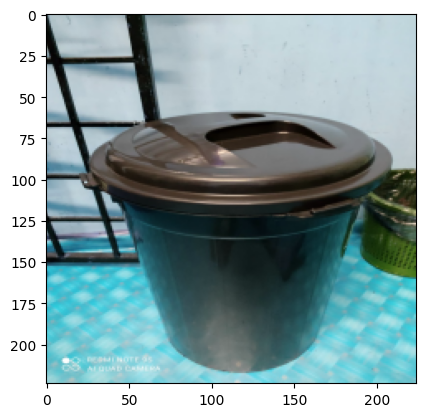

In [9]:
# Test the model on a sample image
test_image_path = "/kaggle/input/test-data/model.jpeg"
im = cv2.imread(test_image_path)
resized_im = cv2.resize(im, (224, 224), interpolation=cv2.INTER_AREA)
plt.imshow(resized_im)
img = np.expand_dims(resized_im, axis=0)
out = model_final.predict(img)

if out[0][0] > out[0][1]:
    print("\nPositive: Plastic container present\n")
else:
    print("\nNegative: No plastic container\n")

In [10]:
# Visualization on some images
z = 0
for filename in os.listdir(path):
    if filename.endswith(".jpg") and filename.startswith("7"):
        z += 1
        img = cv2.imread(os.path.join(path, filename))
        resized = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)
        img = np.expand_dims(resized, axis=0)
        out = model_final.predict(img)
        if out[0][0] > 0.65:
            plt.figure()
            plt.imshow(img)